<a href="https://colab.research.google.com/github/madachy/sd_incose/blob/master/Target_Shooter_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Target Shooter System

Run the cell below once at the beginning of each session. The output can then be cleared. There is also a method to permanently install se-lib to eliminate this step.

In [ ]:
!pip install se-lib

from selib import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Capability Requirements

The Target Shooter System desired capability is to destroy incoming targets.  It is desired to be timely, lethal and within budget. 

The requirements are stated as Measures of Effectiveness (MOE) for the attributes with objective thresholds shown below.  The primary MOE analyzed herein is target destruction response time.

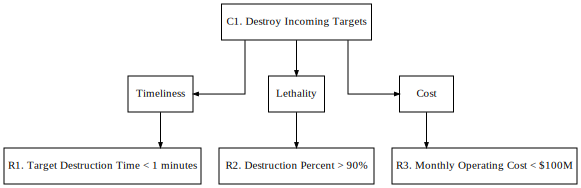

In [ ]:
# target shooter system requirements
target_destruction_time = 1
target_destruction_percent = 90
cost_budget = 100 # $M

requirements = [("C1. Destroy Incoming Targets", "Timeliness"),
                ("C1. Destroy Incoming Targets", "Lethality"),
                 ("C1. Destroy Incoming Targets", "Cost"),
                  ("Timeliness", f"R1. Target Destruction Time < {target_destruction_time} minutes"),
               ("Lethality", f"R2. Destruction Percent > {target_destruction_percent}%"),
               ("Cost", f"R3. Monthly Operating Cost < ${cost_budget}M"),
                 ]
tree(requirements)

## Scenarios

This capability analysis will vary weapons technology and the number of shooters. Simulation experiments are performed with the two factors at two levels (2 * 2 = 4 combinations). 


In [ ]:
# scenario experiments
weapons_technologies = ["Normal", "High"]
shooters = [1, 2, 3]

## Parameters

In [ ]:
# default input parameters
num_shooters = 1
num_targets = 100
weapons_technology = "Normal"

# weapons technology performance
if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

# fixed operational costs
costs = [100, 150, 125, 175]

## Discrete Event Simulation Model

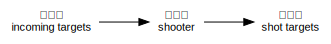

In [ ]:
# target shooter system

if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

init_de_model()
add_source('incoming targets',
           entity_name="target",
           num_entities = num_targets,
           connections={'shooter': 1},
           interarrival_time='np.random.exponential(2)')

add_server(name='shooter',
           connections={'shot targets': 1},
           service_time=shooting_time,
           capacity = num_shooters)

add_terminate('shot targets')

draw_model_diagram(filename="target_shooter_model_diagram", format='svg')

In [ ]:
model_data, target_entity_data = run_model()
print(model_data)
print(target_entity_data)

def calculate_time_difference(simulation_output):
    time_differences = {}
    for entity, data in simulation_output.items():
        time_differences[entity] = data['departure'] - data['arrival']
    return time_differences

time_differences = calculate_time_difference(target_entity_data)
# Calculate the percentage of time differences less than 2
count = sum(1 for time in time_differences if time_differences[time] < 1.2)
percentage = count / len(time_differences) * 100

print(f'{target_entity_data =}')
# Print the percentage
print(f"The percentage of time differences less than 2 is {percentage:.2f}%")

3.1092723335984522: target 1 entered from incoming targets
3.1092723335984522: target 1 incoming targets -> shooter
3.1092723335984522: target 1 requesting shooter resource 
3.1092723335984522: target 1 granted shooter resource waiting time 0.0
3.964002164552438: target 1 completed using shooter resource with service time 0.8547298309539858
3.964002164552438: target 1 shooter -> shot targets
3.964002164552438: target 1 leaving system at shot targets 
4.588590400869989: target 2 entered from incoming targets
4.588590400869989: target 2 incoming targets -> shooter
4.588590400869989: target 2 requesting shooter resource 
4.588590400869989: target 2 granted shooter resource waiting time 0.0
5.378424044987565: target 3 entered from incoming targets
5.378424044987565: target 3 incoming targets -> shooter
5.378424044987565: target 3 requesting shooter resource 
5.5207700598103155: target 2 completed using shooter resource with service time 0.9321796589403267
5.5207700598103155: target 2 shoot

### Response Times

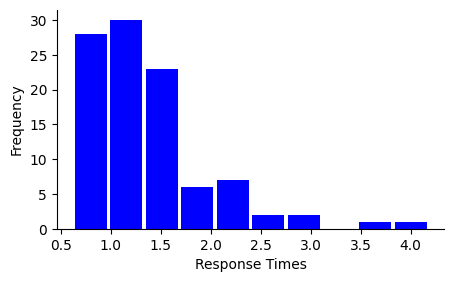

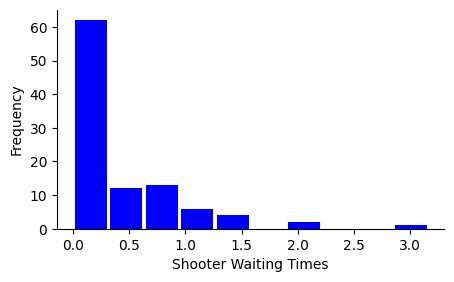

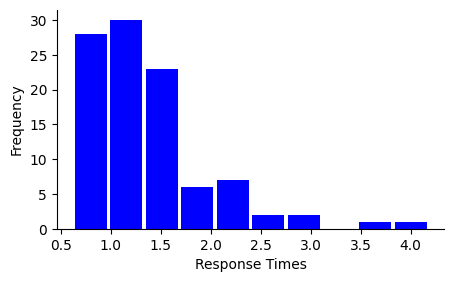

In [ ]:
plot_histogram(model_data['shooter']['waiting_times'], xlabel="Shooter Waiting Times")
plot_histogram(time_differences.values(), xlabel="Response Times")

In [ ]:
time_differences

{1: 0.8547298309539859,
 2: 0.9321796589403268,
 3: 1.1195324961258484,
 4: 1.134529950164346,
 5: 1.0126875689762205,
 6: 1.094732493179098,
 7: 1.0953369790476426,
 8: 1.4739025373204786,
 9: 1.4023756705721802,
 10: 1.5044881618601984,
 11: 0.958612948836091,
 12: 0.7197949357914268,
 13: 1.2001019193977633,
 14: 0.9055625960817544,
 15: 1.053598837656768,
 16: 1.6476762965341152,
 17: 1.0541342624101873,
 18: 0.668647108466935,
 19: 0.8335192891504448,
 20: 0.8415604559828154,
 21: 0.7694600393406503,
 22: 0.9216924502412738,
 23: 0.9564986812308831,
 24: 1.9329821384074535,
 25: 2.211782846317071,
 26: 2.9064525736975497,
 27: 1.0598958460644639,
 28: 1.7273872528487715,
 29: 1.7009746137125816,
 30: 1.3896972124849682,
 31: 0.6730191297306334,
 32: 0.9712458635249703,
 33: 1.5320172959365408,
 34: 2.375744057727289,
 35: 2.412824982655067,
 36: 3.00508049391442,
 37: 1.4988600585867715,
 38: 1.0753698828858518,
 39: 1.060437000380773,
 40: 1.509210275992288,
 41: 0.71707375521901

## Monte Carlo Simulation and Output Analysis

In [ ]:
# Target Shooter System Monte Carlo Simulation and Output Analysis

import numpy as np

# evaluate measure of performance to attain objective mean response time < 2

response_times_dict={}

scenarios = [{'weapons_technology': weapons_technology, 'num_shooters': num_shooters} for weapons_technology in weapons_technologies for num_shooters in shooters]

for scenario in scenarios:
    mean_response_times = []
    response_time_goal_attainment_percent = []
    response_times_dict
    for run in range(100):
        print(scenario)
        response_times = []

        if scenario['weapons_technology'] == "High": shooting_time = 'abs(np.random.normal(.8, .2))'
        if scenario['weapons_technology'] == "Normal": shooting_time = 'np.clip(np.random.normal(1, .5), 0, 10)'

        init_de_model()
        add_source('incoming targets',
                entity_name="target",
                num_entities = num_targets,
                connections={'shooter': 1},
                interarrival_time='np.random.exponential(3)')

        add_server(name='shooter',
                connections={'shot targets': 1},
                service_time=shooting_time,
                capacity = num_shooters)

        add_terminate('shot targets')

        model_data, target_entity_data = run_model(verbose=False)

        response_times = [target['departure'] - target['arrival'] for target in target_entity_data.values()]

        # Calculate the percentage of response times less than 2
        count = sum(1 for time in response_times if time < 1.2)
        percentage = count / len(response_times) * 100
        response_time_goal_attainment_percent.append(percentage)

        mean_response_times.append(np.mean(response_times))
        response_times_dict[(scenario['weapons_technology'], scenario['num_shooters'])] = mean_response_times

response_time_goal_attainment_percent
mean_response_times
response_times_dict

{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_te

{('Normal', 1): [1.3029104300376608,
  1.142983867596479,
  1.3106866668901551,
  1.181684241577831,
  1.2226332801176287,
  1.1591257291896284,
  1.0599750850593437,
  1.224030177251106,
  1.4401187323109395,
  1.0122336368223486,
  1.282690904493541,
  1.3920910412728003,
  1.1319792344553314,
  1.3942146643658009,
  1.1025279551609135,
  1.188765639245835,
  1.2238783670600788,
  1.330914329912573,
  1.5602624083063084,
  1.3495727784668758,
  1.3933634710671834,
  1.1846722703983859,
  1.2822351085489134,
  1.3450090306075728,
  1.4483671235276676,
  1.2100800376531253,
  1.173868612408559,
  1.526453443853376,
  1.284659232518783,
  1.207092849431993,
  1.2790323894315447,
  1.2317300363404748,
  1.2400329793708678,
  1.231276341964951,
  1.244673997819347,
  1.724920944256204,
  1.1835676290263695,
  1.3433152992093238,
  1.2850561269522012,
  1.2281317447797604,
  1.2576247954036264,
  1.4180476604740313,
  1.4357865068866074,
  1.2349883022458186,
  1.1911218820760734,
  1.4064

In [ ]:
response_time_goal_attainment_percent
mean_response_times
response_times_dict

{('Normal', 1): [1.3029104300376608,
  1.142983867596479,
  1.3106866668901551,
  1.181684241577831,
  1.2226332801176287,
  1.1591257291896284,
  1.0599750850593437,
  1.224030177251106,
  1.4401187323109395,
  1.0122336368223486,
  1.282690904493541,
  1.3920910412728003,
  1.1319792344553314,
  1.3942146643658009,
  1.1025279551609135,
  1.188765639245835,
  1.2238783670600788,
  1.330914329912573,
  1.5602624083063084,
  1.3495727784668758,
  1.3933634710671834,
  1.1846722703983859,
  1.2822351085489134,
  1.3450090306075728,
  1.4483671235276676,
  1.2100800376531253,
  1.173868612408559,
  1.526453443853376,
  1.284659232518783,
  1.207092849431993,
  1.2790323894315447,
  1.2317300363404748,
  1.2400329793708678,
  1.231276341964951,
  1.244673997819347,
  1.724920944256204,
  1.1835676290263695,
  1.3433152992093238,
  1.2850561269522012,
  1.2281317447797604,
  1.2576247954036264,
  1.4180476604740313,
  1.4357865068866074,
  1.2349883022458186,
  1.1911218820760734,
  1.4064

### Mean Response Times

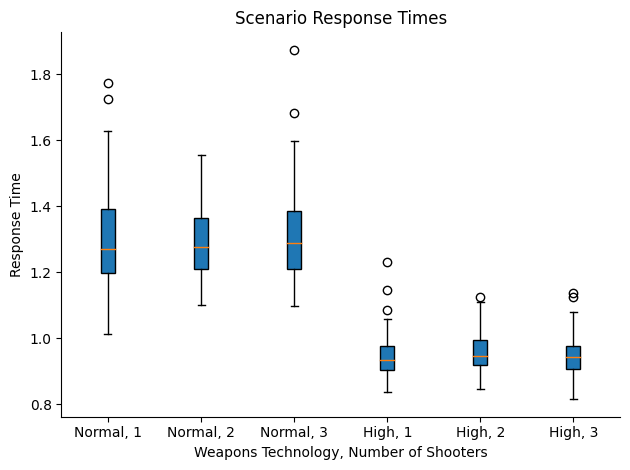

In [ ]:
import matplotlib.pyplot as plt
# boxplots

data_lists = []
tick_labels = []
for scenario in scenarios:
    data_lists.append(response_times_dict[(scenario['weapons_technology'], scenario['num_shooters'])])
    tick_labels.append(f"{scenario['weapons_technology']}, {scenario['num_shooters']}")

figure, axis1 = plt.subplots()
#axis1.set_ylim([40, 90])
axis1.set_title('Scenario Response Times')
axis1.set_xlabel('Weapons Technology, Number of Shooters')
axis1.set_ylabel('Response Time')
axis1.boxplot(data_lists, widths=0.15, vert=True, patch_artist=True)
axis1.set(xticklabels = tick_labels)

plt.tight_layout()
plt.show()

In [ ]:
scenarios

[{'weapons_technology': 'Normal', 'num_shooters': 1},
 {'weapons_technology': 'Normal', 'num_shooters': 2},
 {'weapons_technology': 'Normal', 'num_shooters': 3},
 {'weapons_technology': 'High', 'num_shooters': 1},
 {'weapons_technology': 'High', 'num_shooters': 2},
 {'weapons_technology': 'High', 'num_shooters': 3}]

In [ ]:
target_entity_data

{1: {'arrival': 0.012393409909760658,
  'nodes': [('shooter', 0.7842754472778327),
   ('shot targets', 0.7842754472778327)],
  'departure': 0.7842754472778327},
 2: {'arrival': 2.165352985909621,
  'nodes': [('shooter', 2.4665360692806892),
   ('shot targets', 2.4665360692806892)],
  'departure': 2.4665360692806892},
 3: {'arrival': 6.043713211588651,
  'nodes': [('shooter', 6.645090218882596),
   ('shot targets', 6.645090218882596)],
  'departure': 6.645090218882596},
 4: {'arrival': 8.20839963868971,
  'nodes': [('shooter', 9.187442126676933),
   ('shot targets', 9.187442126676933)],
  'departure': 9.187442126676933},
 5: {'arrival': 12.58283273189687,
  'nodes': [('shooter', 13.719596101267598),
   ('shot targets', 13.719596101267598)],
  'departure': 13.719596101267598},
 6: {'arrival': 13.379673316061005,
  'nodes': [('shooter', 14.246598626682417),
   ('shot targets', 14.246598626682417)],
  'departure': 14.246598626682417},
 7: {'arrival': 15.658466235962933,
  'nodes': [('shoot

In [ ]:
model_data

{'incoming targets': {'type': 'source',
  'entity_name': 'target',
  'num_entities': 100,
  'connections': {'shooter': 1},
  'interarrival_time': 'np.random.exponential(3)',
  'arrivals': [0.012393409909760658,
   2.165352985909621,
   6.043713211588651,
   8.20839963868971,
   12.58283273189687,
   13.379673316061005,
   15.658466235962933,
   16.70733296479221,
   16.742219014382275,
   17.40455321182466,
   19.767122044001336,
   23.0520378281427,
   23.220466410258485,
   24.6969856507405,
   26.5049988864803,
   28.867491663054405,
   29.16772213043195,
   32.750772396535474,
   33.57140950687214,
   36.982809326222124,
   37.97436236395568,
   41.747838572725044,
   44.8557154584125,
   46.3075057115527,
   47.03138354996829,
   47.87215061301379,
   48.1138553988815,
   48.25624333358919,
   48.84011680895778,
   49.66304861033733,
   52.970822827244156,
   56.53593929101308,
   56.54840009197205,
   57.65396011056334,
   64.77137238328764,
   65.50307499538206,
   67.0899131313

### MOE Confidence Intervals


In [ ]:
import scipy.stats as st

# 95% confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html, last term is standard error of mean

for scenario in scenarios:
    data = response_times_dict[(scenario['weapons_technology'], scenario['num_shooters'])]
    print(f"{scenario['weapons_technology']}, {scenario['num_shooters']} mean 95% CI  = ", st.norm.interval(alpha=0.95, loc=np.mean(data), scale=(np.std(data) / np.sqrt(np.size(data))))) 

Normal, 1 mean 95% CI  =  (1.2696085913183985, 1.3269517395163177)
Normal, 2 mean 95% CI  =  (1.2642040285744938, 1.3036583154311052)
Normal, 3 mean 95% CI  =  (1.2825192568597394, 1.3324843954196877)
High, 1 mean 95% CI  =  (0.930459805202403, 0.9545024172532036)
High, 2 mean 95% CI  =  (0.947501590091421, 0.9709281353427379)
High, 3 mean 95% CI  =  (0.9363340004948156, 0.9578786938835308)


<ipython-input-164-9b7fdaf76099>:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  print(f"{scenario['weapons_technology']}, {scenario['num_shooters']} mean 95% CI  = ", st.norm.interval(alpha=0.95, loc=np.mean(data), scale=(np.std(data) / np.sqrt(np.size(data)))))


In [ ]:
## MOE Hypothesis Testing

### MOE Hypothesis Testing



In [ ]:
import statsmodels.api as sm
import sys

# hypothesis testing

print(f"Testing Variants for Destruction Time MOE Objective of {target_destruction_time} Minutes\n")

# 1-sided test
H0 = "HO mean < 2"
HA = "HA mean >= 2"
alpha = .05 # Significant level(α)
value = target_destruction_time

# hypothesis test and color code scenarios not meeting performance thresholds
for scenario in scenarios:
    data = response_times_dict[(scenario['weapons_technology'], scenario['num_shooters'])]
    ztest_score, p_value = sm.stats.ztest(data, value = value, alternative = "larger")
    print(f"{scenario['weapons_technology']},"+f" {scenario['num_shooters']} response_times\n", f'{ztest_score= :.2f}', f'{p_value= :.3f}')
    if(p_value <  alpha):
        print(f"\033[91mReject null hypothesis {H0} and accept {HA}\033[0m\n")
    else:
        print(f"Fail to reject null hypothesis {H0}\n")

Testing Variants for Destruction Time MOE Objective of 1 Minutes

Normal, 1 response_times
 ztest_score= 20.29 p_value= 0.000
Reject null hypothesis HO mean < 2 and accept HA mean >= 2

Normal, 2 response_times
 ztest_score= 28.07 p_value= 0.000
Reject null hypothesis HO mean < 2 and accept HA mean >= 2

Normal, 3 response_times
 ztest_score= 24.00 p_value= 0.000
Reject null hypothesis HO mean < 2 and accept HA mean >= 2

High, 1 response_times
 ztest_score= -9.33 p_value= 1.000
Fail to reject null hypothesis HO mean < 2

High, 2 response_times
 ztest_score= -6.79 p_value= 1.000
Fail to reject null hypothesis HO mean < 2

High, 3 response_times
 ztest_score= -9.58 p_value= 1.000
Fail to reject null hypothesis HO mean < 2



### Interaction Plots

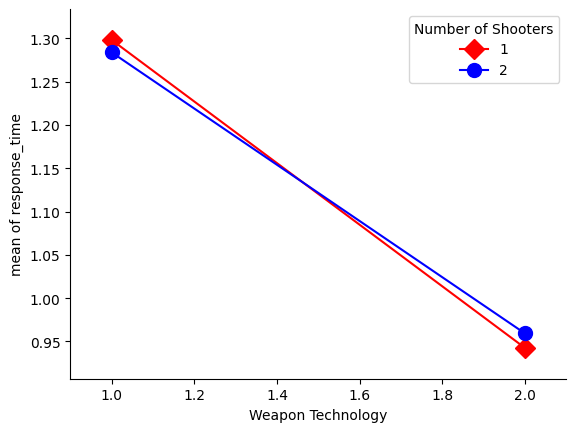

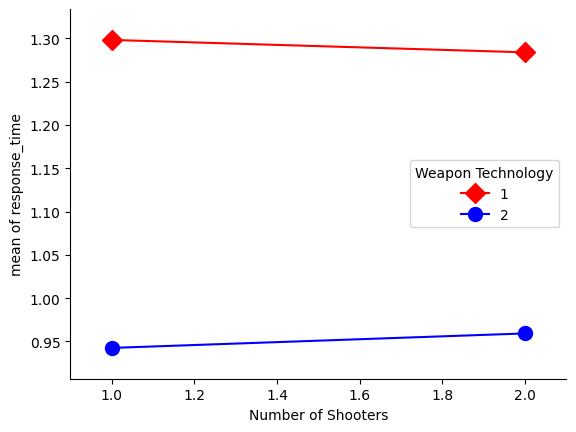

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

# interaction plots
weapon_technology = [1, 2, 1, 2] # normal, high, normal, high
number_shooters = [1, 1, 2, 2]
mean_response_time = [np.mean(response_times_dict[('Normal', 1)]), np.mean(response_times_dict[('High', 1)]), np.mean(response_times_dict[('Normal', 2)]), np.mean(response_times_dict[('High', 2)])]

fig = interaction_plot(weapon_technology, number_shooters, mean_response_time, xlabel='Weapon Technology', ylabel='response_time', colors=['red', 'blue'], markers=['D', 'o'], ms=10)
plt.legend([1, 2], title = 'Number of Shooters')
plt.show()

fig = interaction_plot(number_shooters, weapon_technology, mean_response_time, xlabel='Number of Shooters', ylabel='response_time', colors=['red', 'blue'], markers=['D', 'o'], ms=10)
plt.legend([1, 2], title = 'Weapon Technology')
plt.show()

### Systems Effectiveness

system_effectiveness=[0.7702497709179205, 1.061029221792323, 0.7788579495582335, 1.042519292463205]


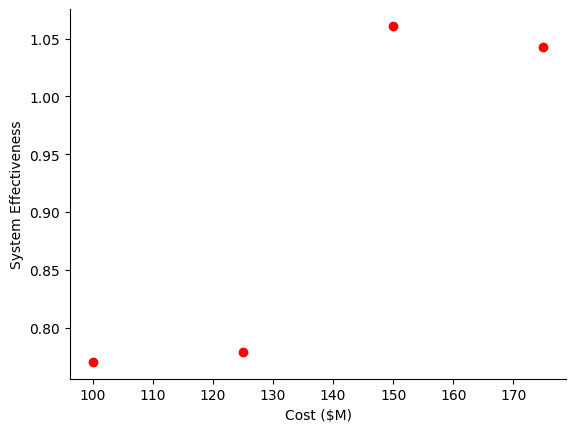

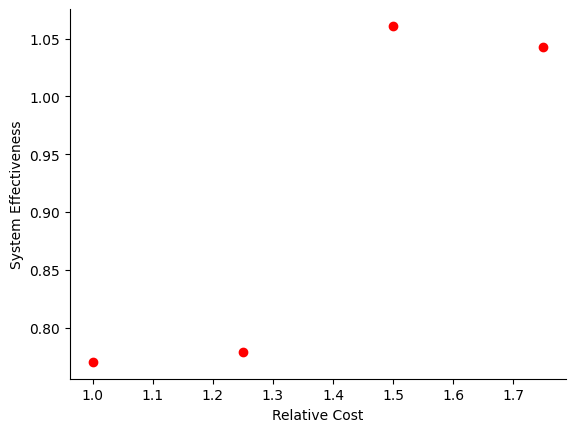

In [ ]:
import matplotlib.pyplot as plt


system_effectiveness = [1/response_time for response_time in mean_response_time]
print(f'{system_effectiveness=}')

relative_costs = [cost/100 for cost in costs]

fig, axis = plt.subplots()
axis.scatter(costs, system_effectiveness, color='red') 
axis.set(xlabel = "Cost ($M)", ylabel='System Effectiveness',)
plt.show()

fig, axis = plt.subplots()
axis.scatter(relative_costs, system_effectiveness, color='red') 
axis.set(xlabel = "Relative Cost", ylabel='System Effectiveness',)
plt.show()

### Cost Effectiveness

cost_effectiveness=[0.007702497709179205, 0.007073528145282153, 0.006230863596465868, 0.0059572530997897425]


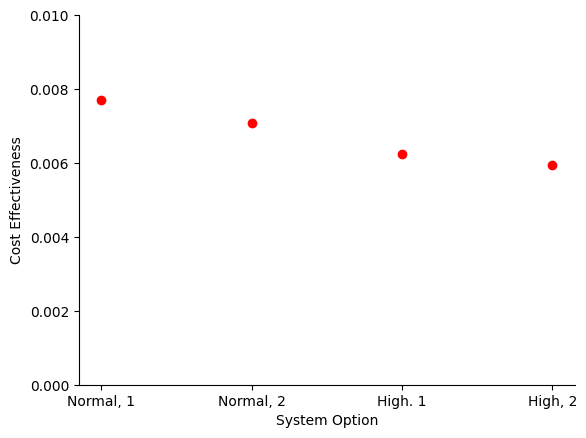

In [ ]:
relative_costs = [cost/100 for cost in costs]

cost_effectiveness = [se/cost for se, cost in zip(system_effectiveness, costs)]
print(f'{cost_effectiveness=}')

fig, axis = plt.subplots()
axis.scatter([1, 2, 3, 4], cost_effectiveness, color='red') 
axis.set(xlabel = "System Option", ylabel='Cost Effectiveness', ylim=(0, .01), xticks=[1, 2, 3, 4], xticklabels=["Normal, 1", "Normal, 2", "High. 1", "High, 2"]) # yticklabels=[None]*6
plt.show()